In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
#import squidpy as sq
import anndata as ad

import warnings
import pickle

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)  




In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.settings.figdir = "fig3"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata=sc.read_h5ad(PATH)
adata=adata[adata.obs["tech"]=="xenium"].copy()
import gc
gc.collect()


7519

In [4]:
NICHE="niche19"
NICHE11="Tzone-like"

CELL_ANNOTATION="lvl5_annotation"

MINIMUM_PERCENT = 0.05
COLOR_PICKLE_PATH= '/nfs/team298/ls34/color_for_adult_skin2.pkl'

In [5]:
adata_time = adata[adata.obs["Site_status"].isin(["Lesional", "Week 12", "Non-lesional"])]
adata_time=adata_time[adata_time.obs["disease_overall"]=="AD"]
                
mask = adata_time.obs["niche19"] == "Tzone-like"
subset = adata_time.obs.loc[mask, "Site_status"]
counts = subset.value_counts()
percentages = counts / counts.sum() * 100

print("Counts:")
print(counts)
print("\nPercentages:")
print(percentages)

Counts:
Site_status
Lesional        13857
Week 12          9753
Non-lesional     6215
Name: count, dtype: int64

Percentages:
Site_status
Lesional        46.461023
Week 12         32.700754
Non-lesional    20.838223
Name: count, dtype: float64


In [6]:
adata = adata[adata.obs[NICHE]==NICHE11]
adata.obs[NICHE].value_counts()

niche19
Tzone-like    73950
Name: count, dtype: int64

In [7]:
adata_5k = adata[adata.obs["Site_status"].isin(["Lesional"])]
adata_time = adata[adata.obs["Site_status"].isin(["Lesional", "Week 12", "Non-lesional"])]
adata_5k_val2 = adata[adata.obs["Site_status"].isin(["3D_Lesional_baseline","3D_Week12",])]
adata_5k_val = adata[adata.obs["Site_status"].isin(["3D_Lesional_baseline","Psoriasis_replicate_Lesional"])]


In [8]:
valid_samples = (
    adata_5k.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_filtered = adata_5k[adata_5k.obs["info_id6"].isin(valid_samples)]
adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC", "Sweat", "Nonsp"))]

valid_samples = (
    adata_5k_val.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_5k_val = adata_5k_val[adata_5k_val.obs["info_id6"].isin(valid_samples)]
adata_5k_val = adata_5k_val[
    ~adata_5k_val.obs[CELL_ANNOTATION].str.startswith(("KC", "Sweat", "Nonsp"))]


valid_samples = (
    adata_time.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_time = adata_time[adata_time.obs["info_id6"].isin(valid_samples)]
adata_time = adata_time[
    ~adata_time.obs[CELL_ANNOTATION].str.startswith(("KC", "Sweat", "Nonsp"))]
adata_5k_val.obs[NICHE].value_counts()


valid_samples = (
    adata_5k_val2.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_5k_val2 = adata_5k_val2[adata_5k_val2.obs["info_id6"].isin(valid_samples)]
adata_5k_val2 = adata_5k_val2[
    ~adata_5k_val2.obs[CELL_ANNOTATION].str.startswith(("KC", "Sweat", "Nonsp"))]

 

In [9]:
ordered_celltypes = [
        "ILC1",
    "ILC3",
"ILC3_CCL1+PTGDS+",
    "ILC2",
    'ILC1/NK','ILC2/3','ILC_prolif', 'ILC_Prolif','NK',
"Neutrophil",
    
    
   'Monocyte', 'Mac','Mac1', 'Mac2', 'Mac2_CCL14hi','Mac_prolif',
    'Mac_TREM2+LPL+',
    'Mast cell', 
    
    
    'MigDC', 
    
    'MigDC (cDC1)',
'MigDC (cDC2)',
    'MoDC', 'LC', 'cDC1', 'cDC2','cDC',
    'cDC2: MMP12hi', 'cDC2: EREG+CCR7+', 'cDC2_cycling', 'pDC', 'TransitionalDC', 'T', 'T_Prolif', 
    'Th/TRM prolif',

'Treg/Tnaive_prolif',
    'Tc',
    'Tc0',
'Tc1',
'Tc2',
'Tc3_IFNGhi',
'Tc_Prolif',
    'Tc_IFNGhi', 'Th', 'Th_PPARGhi', 'Tnaive/Tcm','Tnaive','Tnaive_CD8',
    'Treg', 'Treg_LRRC32+', 
    'Tc_ZNF683+', 'T_γδ','TRM_IL13+', 
    'TRM_IL13', 'TRM_IL17','TRM_IL17+',
    'TR1', 'VE1_Art', 'VE2', 'VE3_Ven', 'VE3_Ven_APLN+', 'VE4_Cap','VE', 'Pericyte1',
    'LE', 'nmSchwann', 

     'Plasma cell', 'Bcell', 
    'mSchwann', 'Pericyte2_VSMC',
    
    
    "F4: DP_HHIP+",'Melanocyte','KC','KC3',
  'Adipocyte',

'Merkel cell',
'Smooth muscle',
        
    'F1: Superficial', 'F1: Superficial regenerative', 'F2: Universal', 'F2/3: Perivascular',
    'F3: FRC-like', 'F4: DS_DPEP1+', 'F4: TNN+COCH+', 'F5: RAMP1+', 'F5: NGFR+',
    'F6: Inflammatory myofibroblast', 

    



]
for x in sorted(list(adata_filtered.obs[CELL_ANNOTATION].unique())):
    if x not in ordered_celltypes:
        print(x)

In [10]:
MINIMUM_PERCENT      = 2
MIN_PERCENT_FOR_TEXT = 5

with open(COLOR_PICKLE_PATH, 'rb') as f:
    colors = pickle.load(f)

# Composition overall

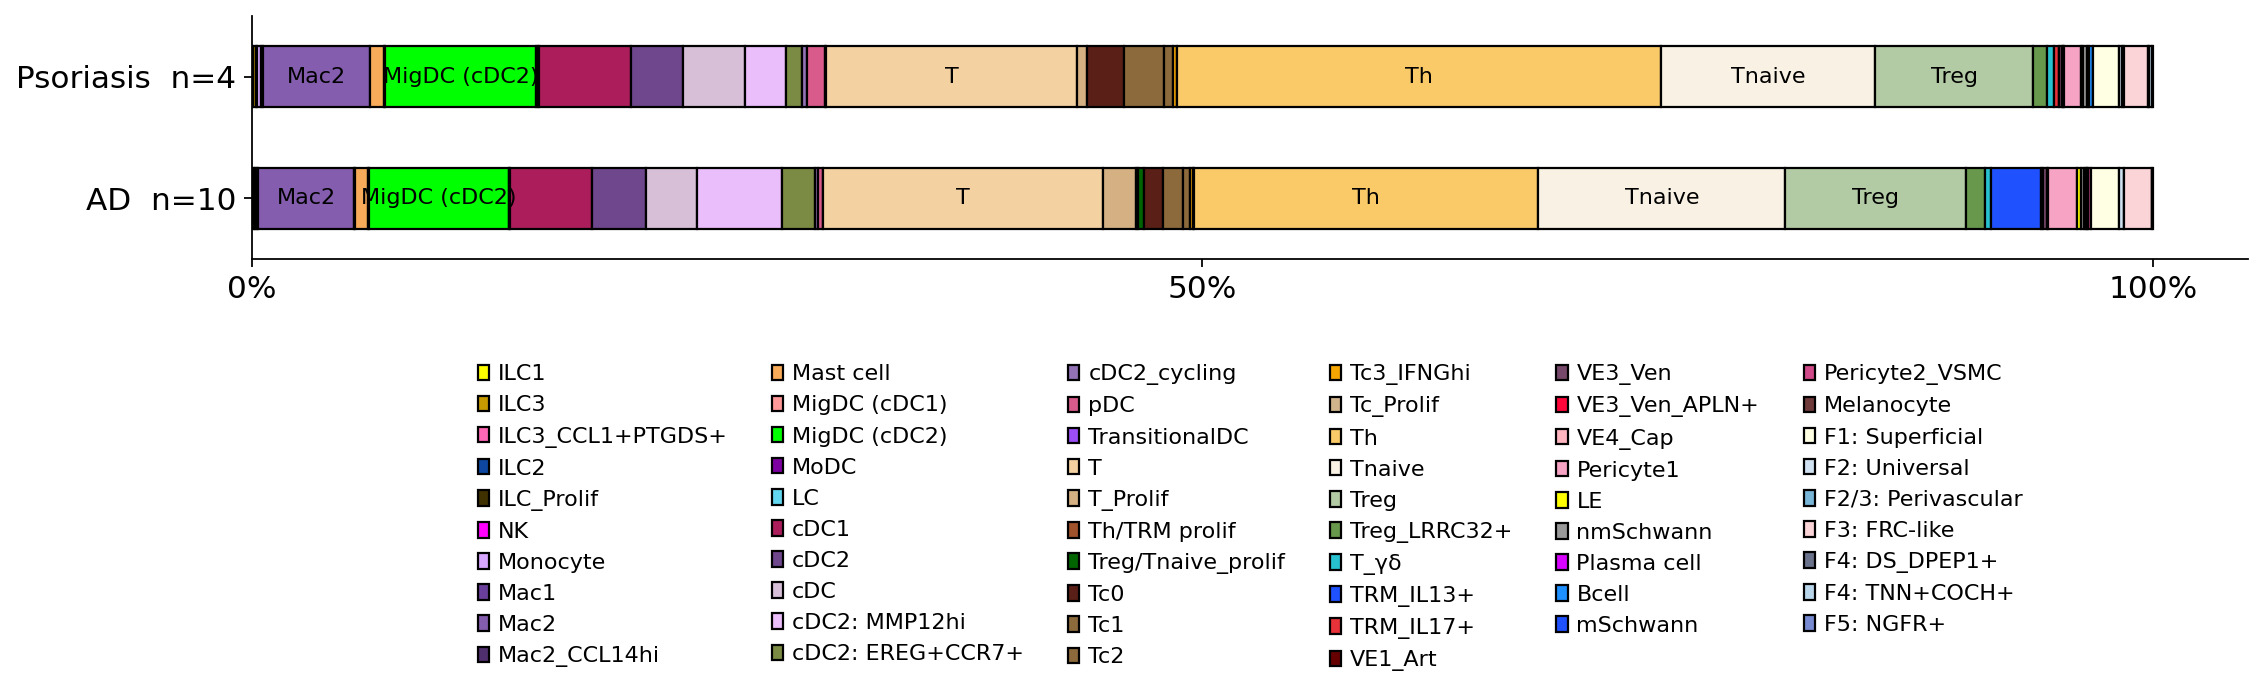

In [11]:
df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall"]].copy()

count_tbl = (
    df.groupby(["disease_overall", CELL_ANNOTATION])
      .size()
      .reset_index(name="cell_count")
)

pivot = (
    count_tbl.pivot(index="disease_overall",
                    columns=CELL_ANNOTATION,
                    values="cell_count")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot       = pivot[ordered_celltypes]
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100



donor_counts = (
    adata_filtered.obs
        .groupby("disease_overall")["Sanger patient ID"]
        .nunique()
)

ytick_labels = [
    f"{d}  n={donor_counts.get(d, 0)}"        # e.g.  AD  n=12
    for d in proportions.index
]

plot_colors = [colors.get(ct, "grey") for ct in ordered_celltypes]



fig, ax = plt.subplots(figsize=(16, 2))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_colors,
    edgecolor="black",
    ax=ax
)

for i, (_, row) in enumerate(proportions.iterrows()):
    cum = 0
    for j, val in enumerate(row):
        if val > MIN_PERCENT_FOR_TEXT:
            ax.text(
                cum + val / 2,
                i,
                ordered_celltypes[j],
                ha="center",
                va="center",
                fontsize=10,
                color="black",
                clip_on=True,
            )
        cum += val

ax.set_ylabel("", fontsize=15)
ax.set_xlabel("",    fontsize=15)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=14)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0%", "50%", "100%"], fontsize=14)

ax.legend(
    title="",
    labels=ordered_celltypes,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.35),
    ncol=6,
    fontsize=10,
    title_fontsize=10,
    frameon=False,
)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
fig.savefig("fig3/3c_perivasc_niche_composition.pdf", dpi=300, bbox_inches="tight")

plt.show()
 

 # validation

In [12]:
MIN_TEXT_PERCENT     = 5
colors_dict          = colors            

adata_filtered = adata_5k_val #[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]


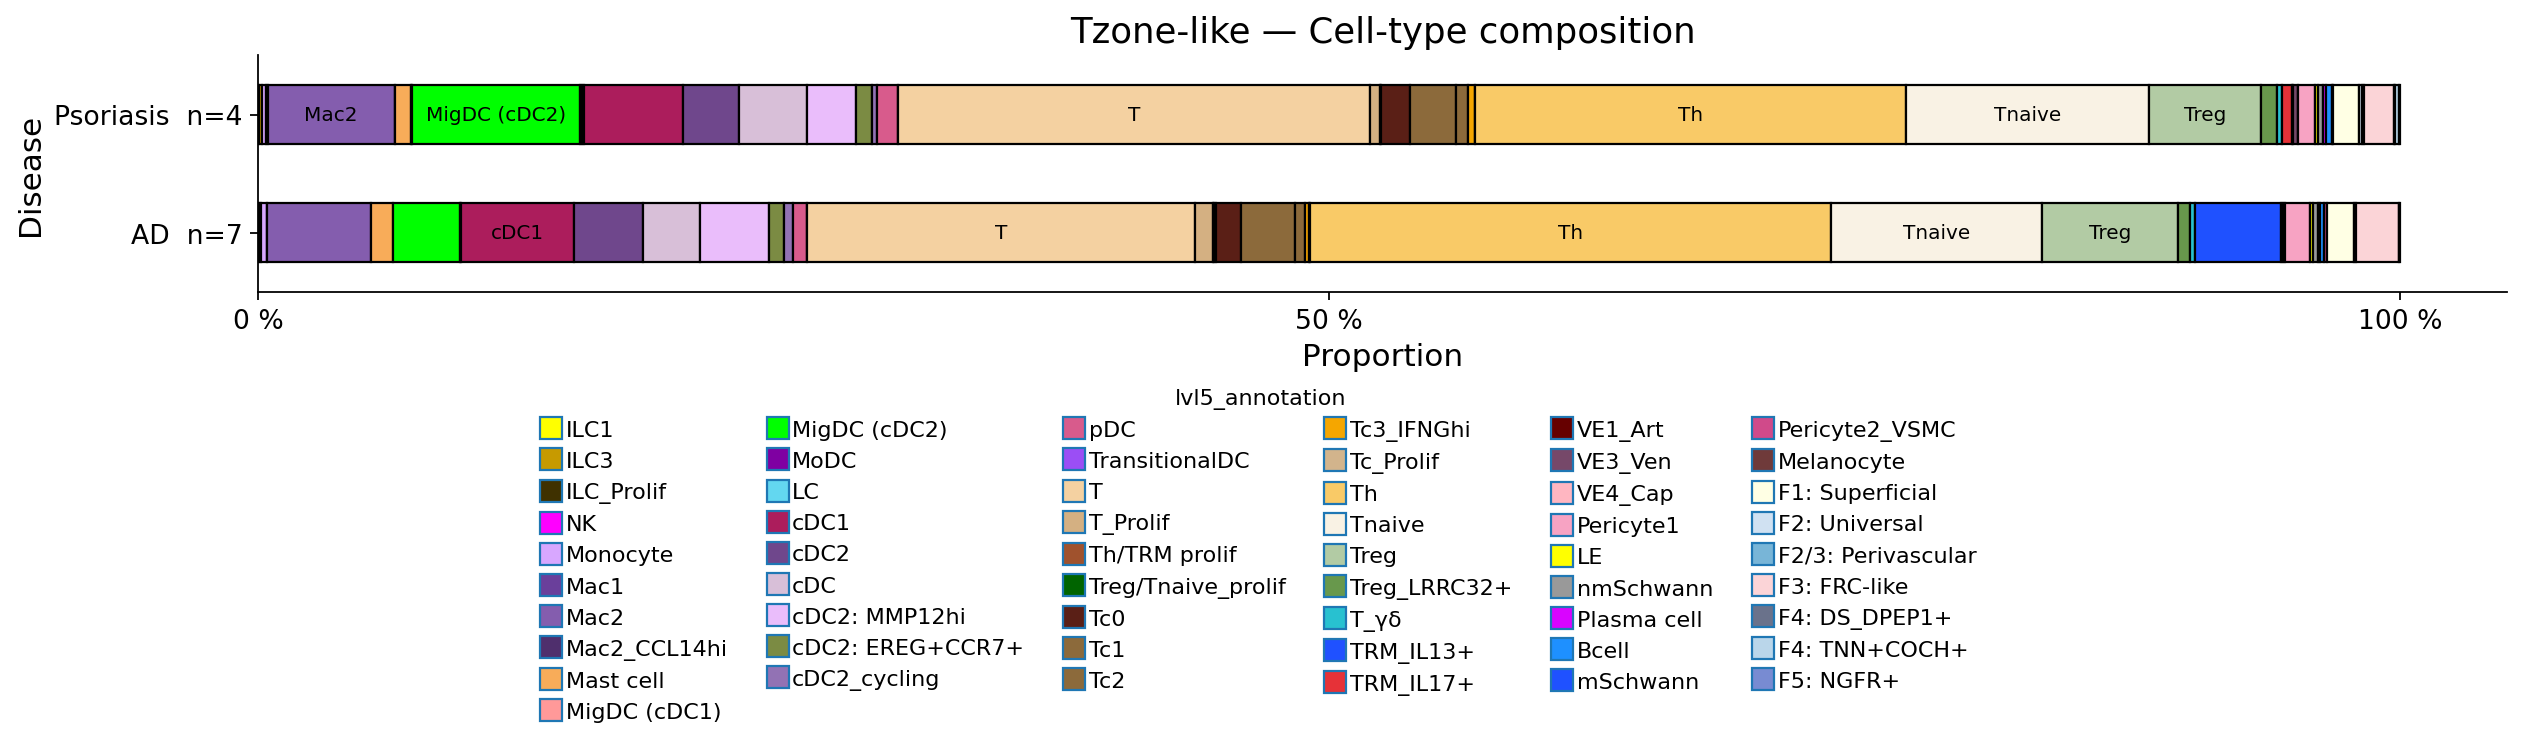

In [13]:
df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall"]]
df


count_tbl = (
    df.groupby(["disease_overall", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index="disease_overall",
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]
MIN_TEXT_PERCENT = 5

df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall"]]

count_tbl = (
    df.groupby(["disease_overall", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index="disease_overall",
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

pivot = pivot.apply(pd.to_numeric)
ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.apply(pd.to_numeric)

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]


donor_counts = (
    adata_filtered.obs
        .groupby("disease_overall")["info_id6"]
        .nunique()
)

ytick_labels = [
    f"{d}  n={donor_counts.get(d, 0)}"        # e.g.  AD  n=12
    for d in proportions.index
]

plot_colors = [colors.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.4 * len(proportions)
fig, ax = plt.subplots(figsize=(16, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
    
)

for r, (_, row) in enumerate(proportions.iterrows()):
    cum = 0
    for c, val in enumerate(row):
        if val > MIN_TEXT_PERCENT:
            ax.text(cum + val/2, r,
                    ordered_celltypes[c],
                    ha="center", va="center",
                    fontsize=9, color="black", clip_on=True)
        cum += val


ax.set_ylabel("Disease", fontsize=14)
ax.set_xlabel("Proportion", fontsize=14)
ax.set_title(f"{NICHE11} — Cell-type composition", fontsize=16)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)
ax.set_yticklabels(ytick_labels, fontsize=12)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


handles = [plt.Line2D([0], [0], marker='s', lw=0,
           markerfacecolor=colors_dict.get(ct, "grey"),
           markersize=10, label=ct)
           for ct in ordered_celltypes]

fig.legend(
    handles,
    ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.7),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("fig3/supp_perivasc_niche_composition_VALIDATION.pdf", dpi=300, bbox_inches="tight")

plt.show()

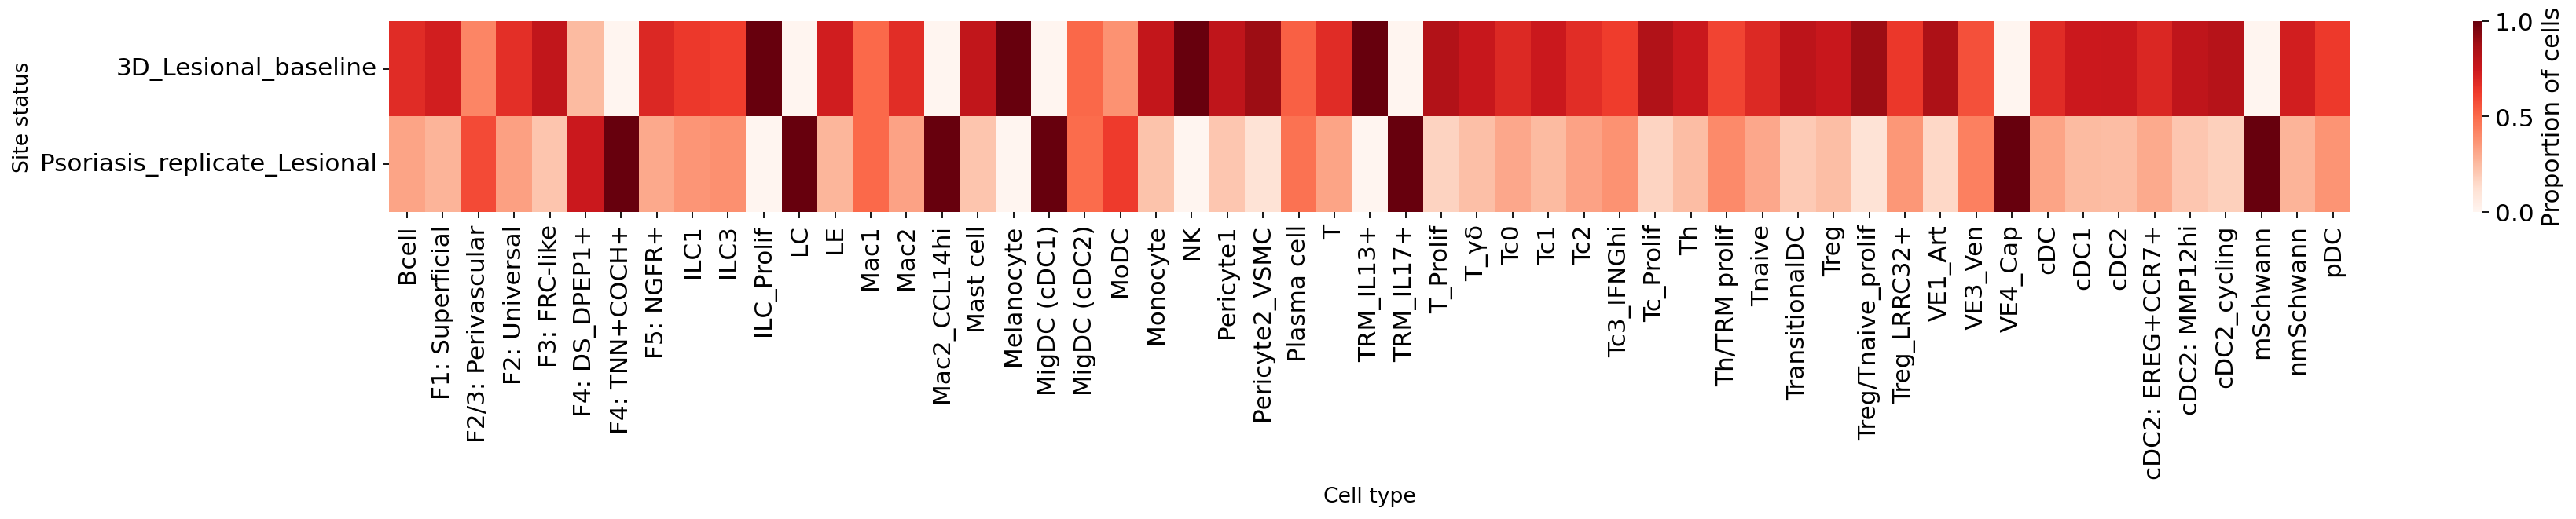

In [14]:
ANNOTATION = "lvl5_annotation"

counts = (
    adata_filtered.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count").fillna(0)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(25, 2))  # wide and short

ax = sns.heatmap(
    data_prop.T,       # transpose so x=cell types, y=site status
    cmap="Reds",
    linewidths=0,      # remove gridlines
    cbar_kws={"label": "Proportion of cells"}
)

plt.title("")
plt.xlabel("Cell type", fontsize=12)
plt.ylabel("Site status", fontsize=12)

ax.grid(False)

plt.tight_layout()
plt.show()

# week 12 val

In [15]:
MIN_TEXT_PERCENT     = 5
colors_dict          = colors            # your colour map


adata_filtered = adata_5k_val2 

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]


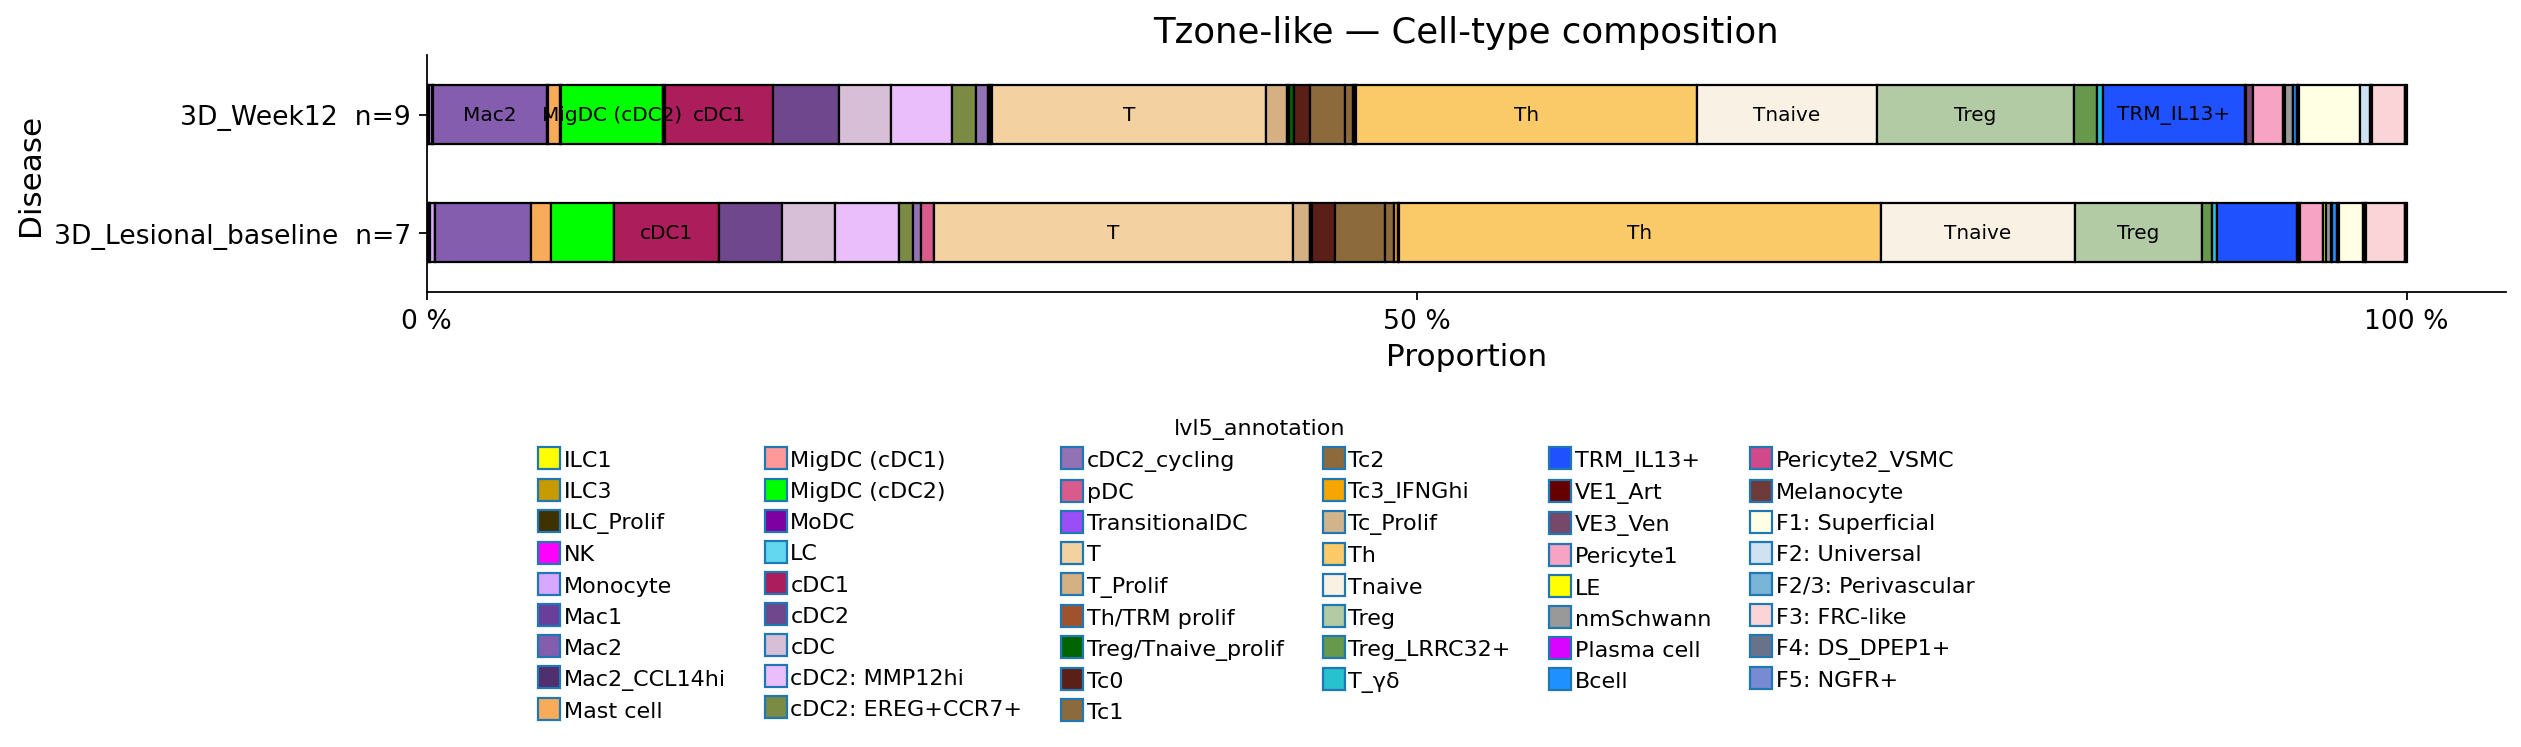

In [16]:
df = adata_filtered.obs[[CELL_ANNOTATION, "Site_status"]]
df


count_tbl = (
    df.groupby(["Site_status", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index="Site_status",
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]
MIN_TEXT_PERCENT = 5


df = adata_filtered.obs[[CELL_ANNOTATION, "Site_status"]]

count_tbl = (
    df.groupby(["Site_status", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index="Site_status",
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

pivot = pivot.apply(pd.to_numeric)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.apply(pd.to_numeric)

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]


donor_counts = (
    adata_filtered.obs
        .groupby("Site_status")["info_id6"]
        .nunique()
)

ytick_labels = [
    f"{d}  n={donor_counts.get(d, 0)}"        # e.g.  AD  n=12
    for d in proportions.index
]

plot_colors = [colors.get(ct, "grey") for ct in ordered_celltypes]


fig_h = 2 + 0.4 * len(proportions)
fig, ax = plt.subplots(figsize=(16, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
    
)


for r, (_, row) in enumerate(proportions.iterrows()):
    cum = 0
    for c, val in enumerate(row):
        if val > MIN_TEXT_PERCENT:
            ax.text(cum + val/2, r,
                    ordered_celltypes[c],
                    ha="center", va="center",
                    fontsize=9, color="black", clip_on=True)
        cum += val


ax.set_ylabel("Disease", fontsize=14)
ax.set_xlabel("Proportion", fontsize=14)
ax.set_title(f"{NICHE11} — Cell-type composition", fontsize=16)
ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)
ax.set_yticklabels(ytick_labels, fontsize=12)
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


handles = [plt.Line2D([0], [0], marker='s', lw=0,
           markerfacecolor=colors_dict.get(ct, "grey"),
           markersize=10, label=ct)
           for ct in ordered_celltypes]

fig.legend(
    handles,
    ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.7),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("fig3/supp_week12_niche_composition_VALIDATION.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [17]:
df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Site_status"]]

count_tbl = (
    df.groupby(["disease_overall", "Site_status", CELL_ANNOTATION])
    .size()
    .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(
        index=["disease_overall", "Site_status"],
        columns=CELL_ANNOTATION,
        values="cells",
    )
    .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]
pivot
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions

lvl5_annotation                           ILC1      ILC3  ILC_Prolif  \
disease_overall Site_status                                            
AD              3D_Lesional_baseline  0.043895  0.081520    0.012542   
                3D_Week12             0.030767  0.053842    0.000000   

lvl5_annotation                             NK  Monocyte      Mac1      Mac2  \
disease_overall Site_status                                                    
AD              3D_Lesional_baseline  0.012542  0.257102  0.025083  4.822224   
                3D_Week12             0.015383  0.161526  0.053842  5.761095   

lvl5_annotation                       Mac2_CCL14hi  Mast cell  MigDC (cDC1)  \
disease_overall Site_status                                                   
AD              3D_Lesional_baseline      0.000000   1.047219      0.000000   
                3D_Week12                 0.038459   0.630721      0.023075   

lvl5_annotation                       ...  Plasma cell     Bcell  \
disease_overall Site_status           ...                          
AD              3D_Lesional_baseline  ...     0.068978  0.225748   
                3D_Week12             ...     0.015383  0.161526   

lvl5_annotation                       Pericyte2_VSMC  Melanocyte  \
disease_overall Site_status                                        
AD              3D_Lesional_baseline        0.100332    0.006271   
                3D_Week12                   0.084609    0.053842   

lvl5_annotation                       F1: Superficial  F2: Universal  \
disease_overall Site_status                                            
AD              3D_Lesional_baseline         1.254154       0.100332   
                3D_Week12                    3.068995       0.507653   

lvl5_annotation                       F2/3: Perivascular  F3: FRC-like  \
disease_overall Site_status                                              
AD              3D_Lesional_baseline            0.031354      1.981564   
                3D_Week12                       0.107684      1.669102   

lvl5_annotation                       F4: DS_DPEP1+  F5: NGFR+  
disease_overall Site_status                                     
AD              3D_Lesional_baseline       0.006271   0.056437  
                3D_Week12                  0.007692   0.053842  

[2 rows x 51 columns]

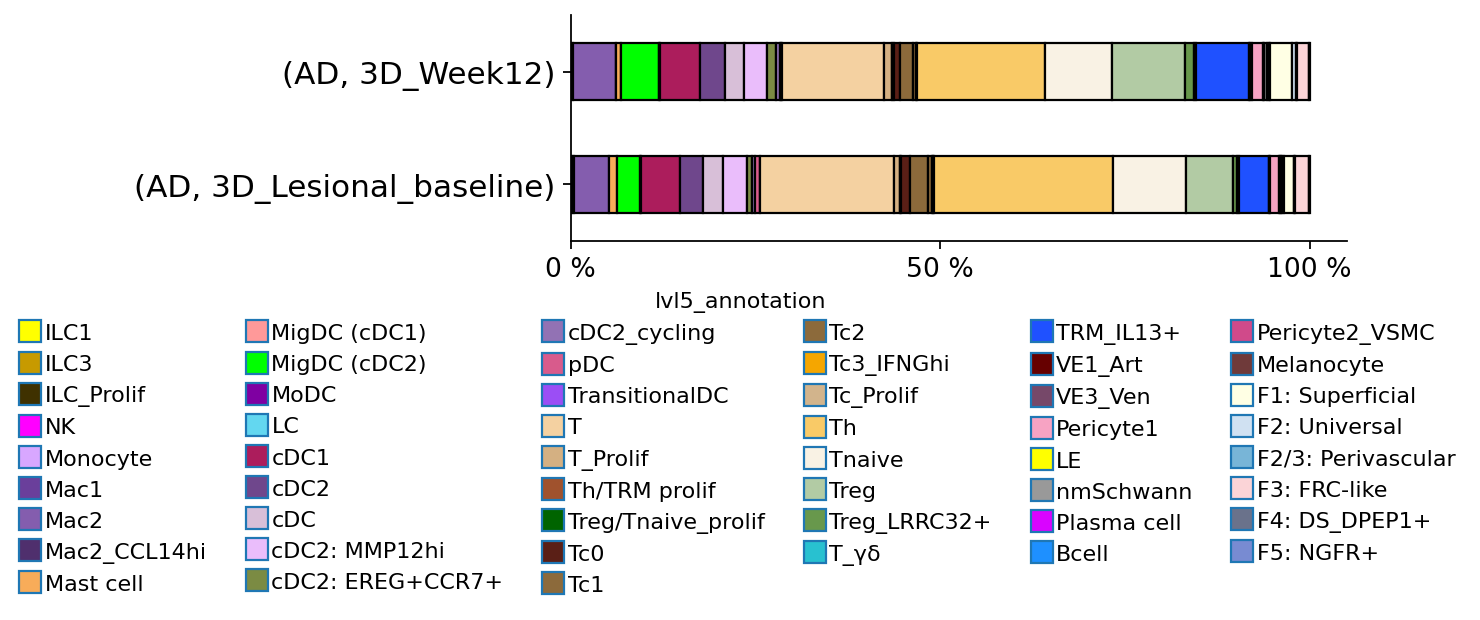

In [18]:
plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))


ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [
    plt.Line2D(
        [0],
        [0],
        marker="s",
        lw=0,
        markerfacecolor=colors_dict.get(ct, "grey"),
        markersize=10,
        label=ct,
    )
    for ct in ordered_celltypes
]

fig.legend(
    handles,
    ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
#fig.savefig("fig3/3j_niches_by_times2_ordered.pdf", dpi=300, bbox_inches="tight")
fig.savefig("fig3/supp_week12_niche_composition_VALIDATIONshort.pdf", dpi=300, bbox_inches="tight")

plt.show()

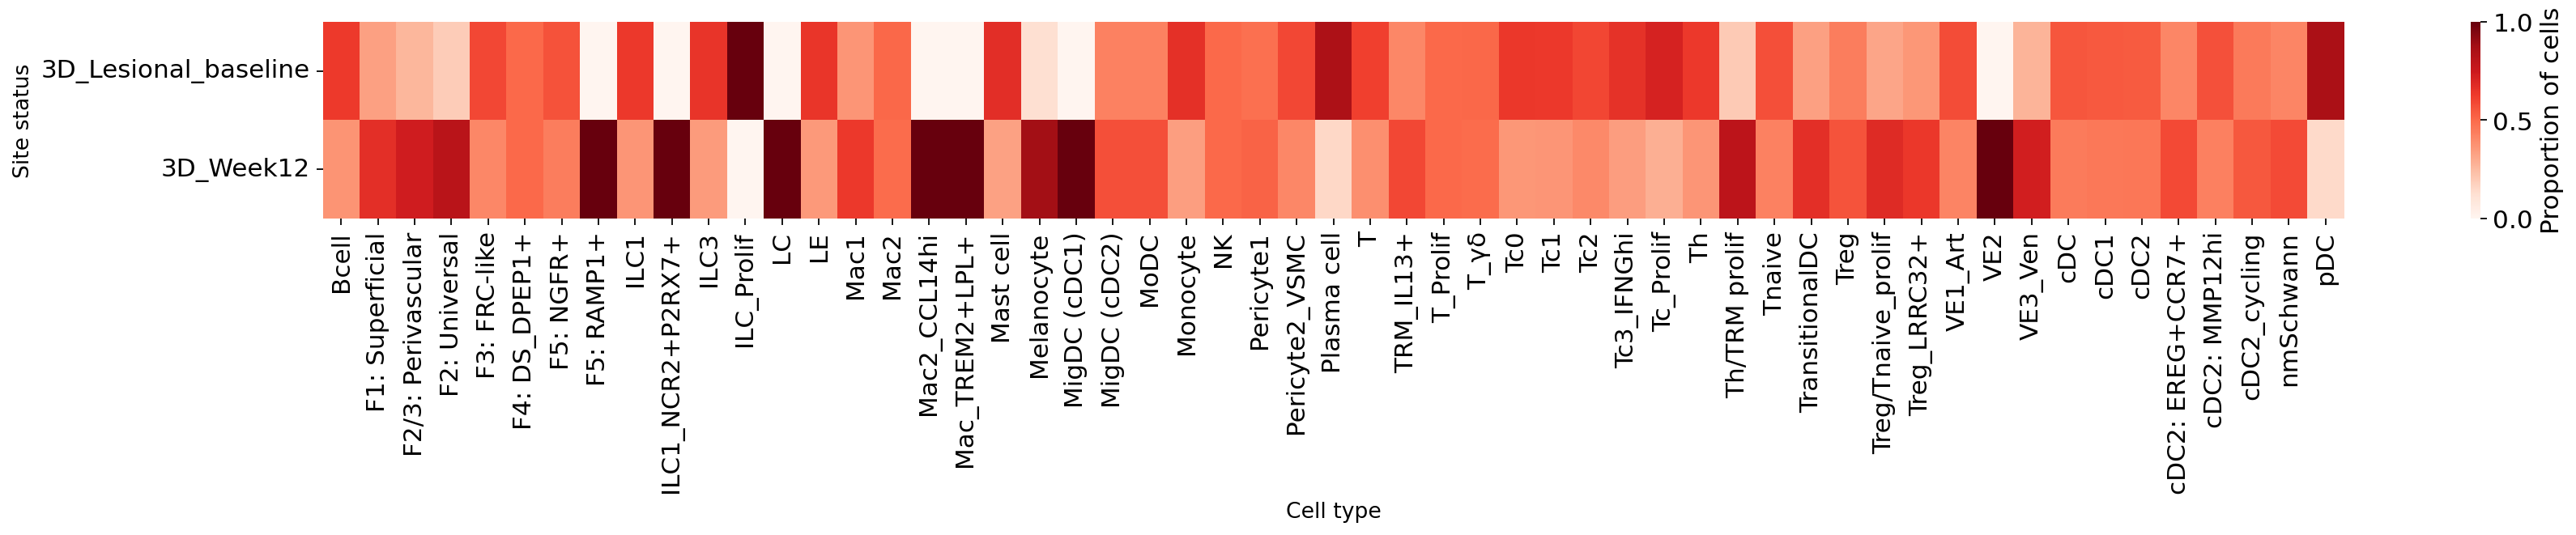

In [19]:
ANNOTATION = "lvl5_annotation"

counts = (
    adata_filtered.obs
    .groupby(["Site_status", ANNOTATION])
    .size()
    .reset_index(name="count")
)

data = counts.pivot(index=ANNOTATION, columns="Site_status", values="count").fillna(0)
data_prop = data.div(data.sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(25, 2))  # wide and short

ax = sns.heatmap(
    data_prop.T,       # transpose so x=cell types, y=site status
    cmap="Reds",
    linewidths=0,      # remove gridlines
    cbar_kws={"label": "Proportion of cells"}
)


plt.title("")
plt.xlabel("Cell type", fontsize=12)
plt.ylabel("Site status", fontsize=12)
ax.grid(False)

plt.tight_layout()
plt.show()

# time

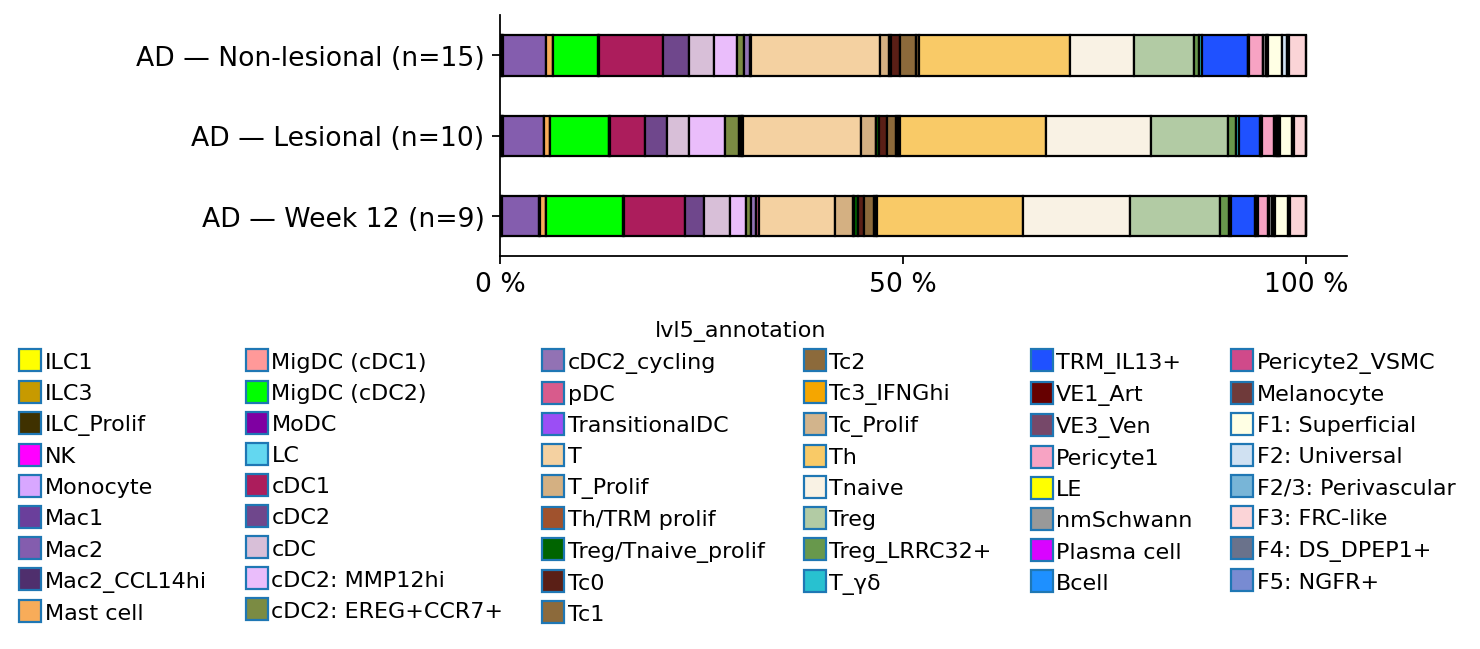

In [20]:
MIN_TEXT_PERCENT = 5
colors_dict          = colors          # <- your colour dictionary

valid_ids = [x for x in adata_time.obs["info_id6"].unique() if "Past" not in x]
adata_time = adata_time[adata_time.obs["info_id6"].isin(valid_ids)]

adata_filtered = adata_time[adata_time.obs["disease_overall"] == "AD"]
valid_samples = (
    adata_filtered.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_filtered = adata_filtered[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Site_status"].str.startswith(("Les", "Week 12", "Non-"))
]

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]


df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Site_status"]]

count_tbl = (
    df.groupby(["disease_overall", "Site_status", CELL_ANNOTATION])
    .size()
    .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(
        index=["disease_overall", "Site_status"],
        columns=CELL_ANNOTATION,
        values="cells",
    )
    .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

multi_index = proportions.index

proportions.index = [f"{d} — {tp}" for d, tp in proportions.index]

pat_counts = (
    adata_filtered.obs.groupby(["disease_overall", "Site_status"])["Sanger patient ID"]
    .nunique()
)

keep_idx = [idx for idx in multi_index if pat_counts.get(idx, 0) > 0]
proportions = proportions.loc[[f"{d} — {tp}" for d, tp in keep_idx]]

label_counts = {f"{d} — {tp}": pat_counts[(d, tp)] for d, tp in keep_idx}
ytick_labels = [f"{label} (n={label_counts[label]})" for label in proportions.index]

desired_order = ["AD — Week 12", "AD — Lesional", "AD — Non-lesional"]

base_to_full = {lab.split(" (n=")[0]: lab for lab in ytick_labels}
valid_order = [base_to_full[d] for d in desired_order if d in base_to_full]
proportions = proportions.loc[[lab.split(" (n=")[0] for lab in valid_order]]
ytick_labels = valid_order

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [
    plt.Line2D(
        [0],
        [0],
        marker="s",
        lw=0,
        markerfacecolor=colors_dict.get(ct, "grey"),
        markersize=10,
        label=ct,
    )
    for ct in ordered_celltypes
]

fig.legend(
    handles,
    ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("fig3/3j_niches_by_times2_ordered.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [21]:
adata_time=adata_time[adata_time.obs["info_id6"]!="BK23_Non-lesional Baseline"]#.obs.info_id6.value_counts()
adata_time=adata_time[adata_time.obs["info_id6"]!="BK24_Non-lesional Baseline"]#.obs.info_id6.value_counts()

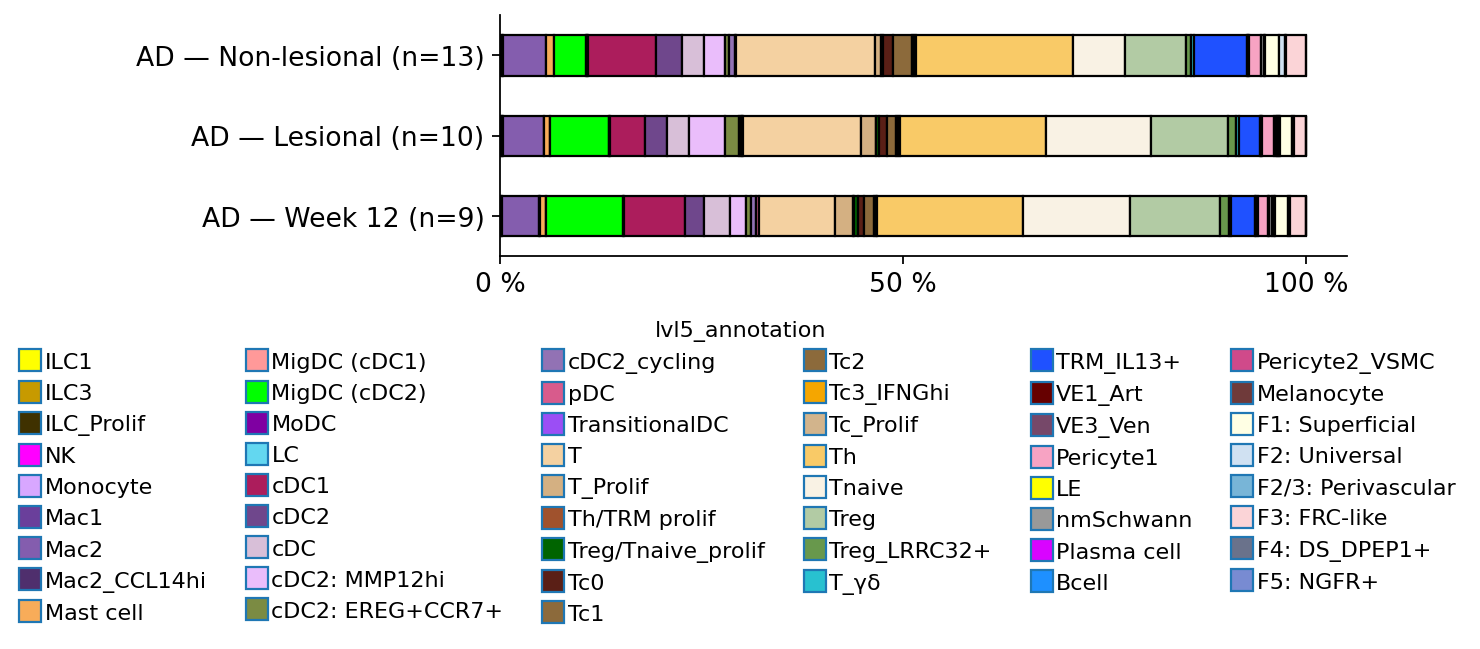

In [22]:
valid_ids = [x for x in adata_time.obs["info_id6"].unique() if "Past" not in x]
adata_time = adata_time[adata_time.obs["info_id6"].isin(valid_ids)]

adata_filtered = adata_time[adata_time.obs["disease_overall"] == "AD"]
valid_samples = (
    adata_filtered.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_filtered = adata_filtered[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Site_status"].str.startswith(("Les", "Week 12", "Non-"))
]

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]

df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Site_status"]]

count_tbl = (
    df.groupby(["disease_overall", "Site_status", CELL_ANNOTATION])
    .size()
    .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(
        index=["disease_overall", "Site_status"],
        columns=CELL_ANNOTATION,
        values="cells",
    )
    .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

multi_index = proportions.index
proportions.index = [f"{d} — {tp}" for d, tp in proportions.index]

pat_counts = (
    adata_filtered.obs.groupby(["disease_overall", "Site_status"])["Sanger patient ID"]
    .nunique()
)

keep_idx = [idx for idx in multi_index if pat_counts.get(idx, 0) > 0]
proportions = proportions.loc[[f"{d} — {tp}" for d, tp in keep_idx]]

label_counts = {f"{d} — {tp}": pat_counts[(d, tp)] for d, tp in keep_idx}
ytick_labels = [f"{label} (n={label_counts[label]})" for label in proportions.index]

desired_order = ["AD — Week 12", "AD — Lesional", "AD — Non-lesional"]

base_to_full = {lab.split(" (n=")[0]: lab for lab in ytick_labels}
valid_order = [base_to_full[d] for d in desired_order if d in base_to_full]
proportions = proportions.loc[[lab.split(" (n=")[0] for lab in valid_order]]
ytick_labels = valid_order

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [
    plt.Line2D(
        [0],
        [0],
        marker="s",
        lw=0,
        markerfacecolor=colors_dict.get(ct, "grey"),
        markersize=10,
        label=ct,
    )
    for ct in ordered_celltypes
]

fig.legend(
    handles,
    ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("fig4_niches_by_times2_ordered.pdf", dpi=300, bbox_inches="tight")

plt.show()

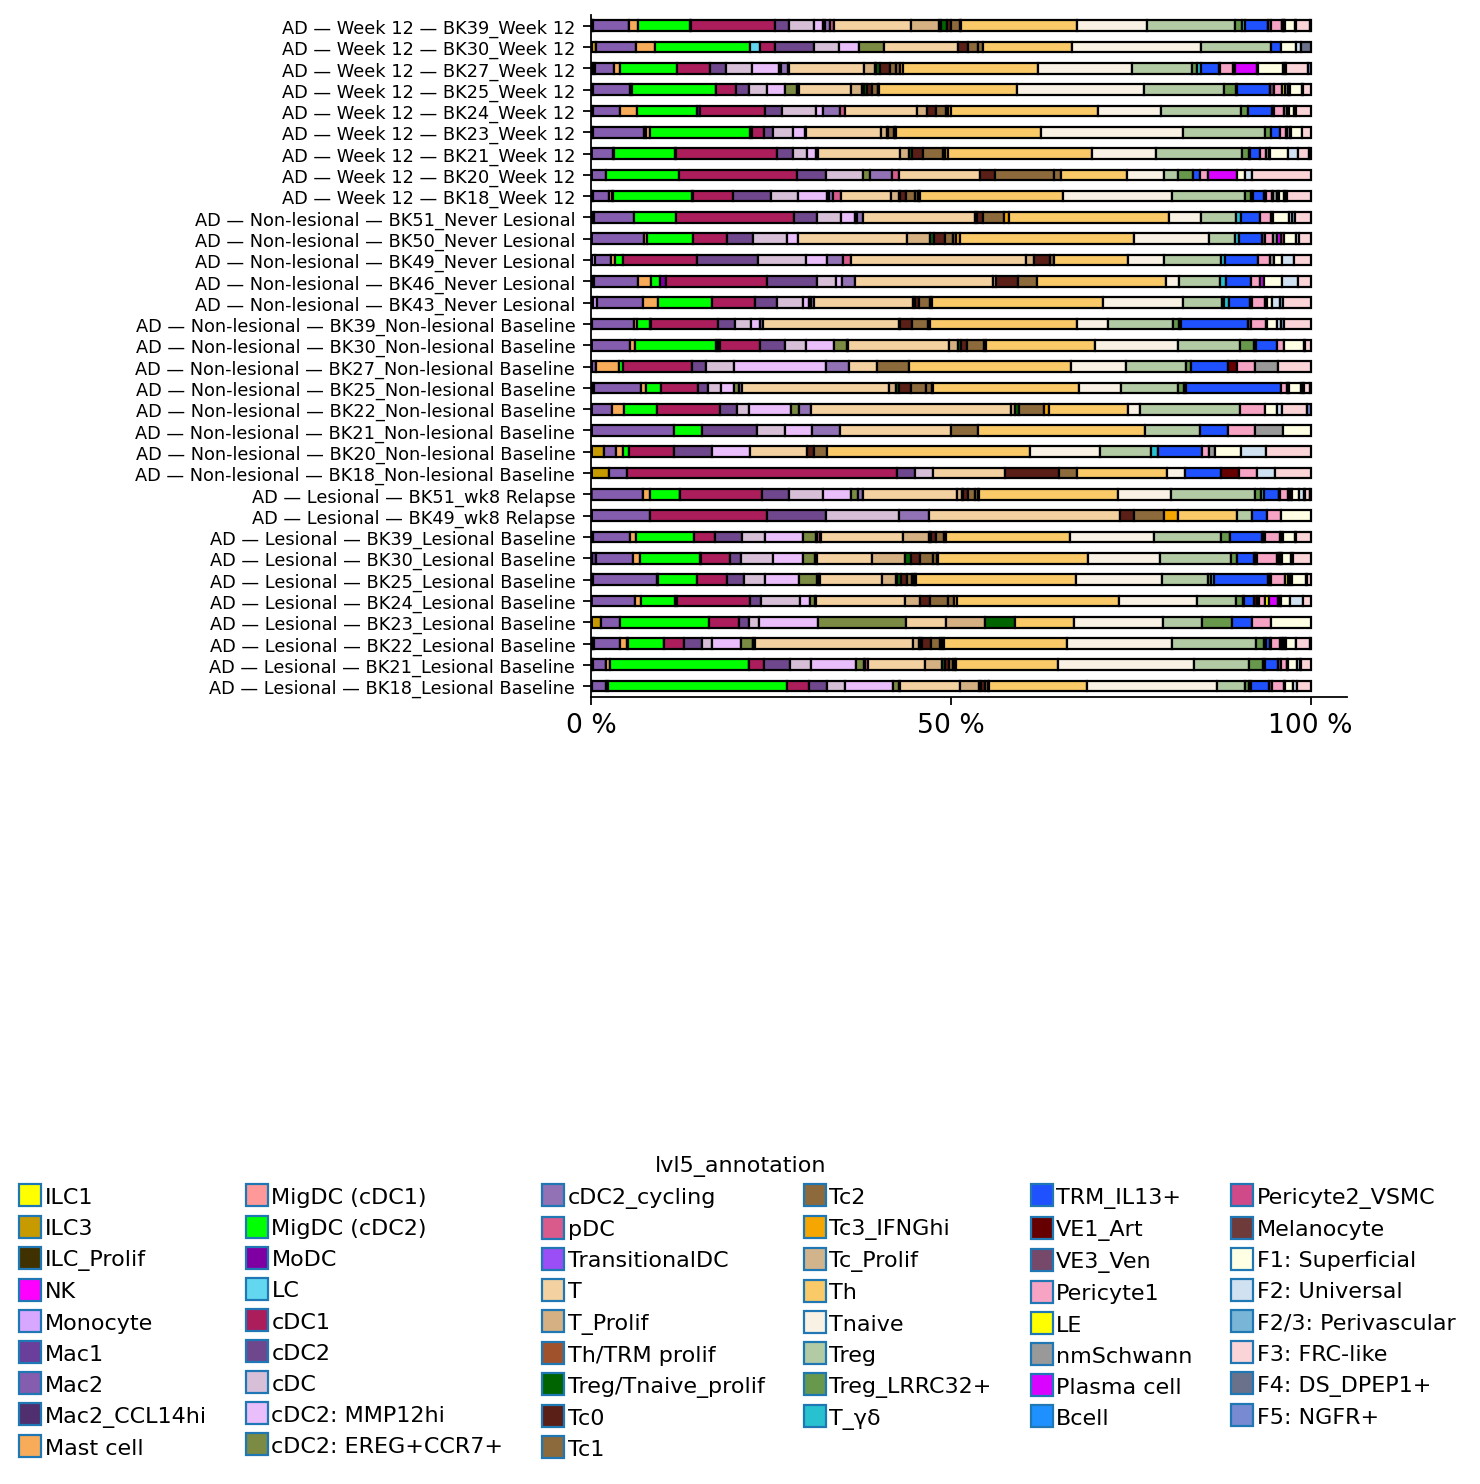

In [23]:
adata_filtered = adata_filtered[adata_filtered.obs["disease_overall"] == "AD"]

valid_samples = (
    adata_filtered.obs["info_id6"]
    .value_counts()
    .loc[lambda s: s > 10]
    .index
)
adata_filtered = adata_filtered[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Site_status"].str.startswith(("Les", "Week 12", "Non-"))
]

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]

df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Site_status", "info_id6"]]

count_tbl = (
    df.groupby(["disease_overall", "Site_status", "info_id6", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(
        index=["disease_overall", "Site_status", "info_id6"],
        columns=CELL_ANNOTATION,
        values="cells"
    )
    .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100
proportions = proportions.loc[proportions.sum(axis=1) > 0]

proportions.index = [
    f"{d} — {tp} — {donor}"
    for d, tp, donor in proportions.index
]
ytick_labels = proportions.index.tolist()

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

ax.set_ylabel("", fontsize=14)
ax.set_xlabel("", fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=8)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [
    plt.Line2D([0], [0], marker='s', lw=0,
               markerfacecolor=colors_dict.get(ct, "grey"),
               markersize=10, label=ct)
    for ct in ordered_celltypes
]

fig.legend(
    handles, ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig("supp/Tzone_proportions_donor.pdf", dpi=300, bbox_inches="tight")
plt.show()

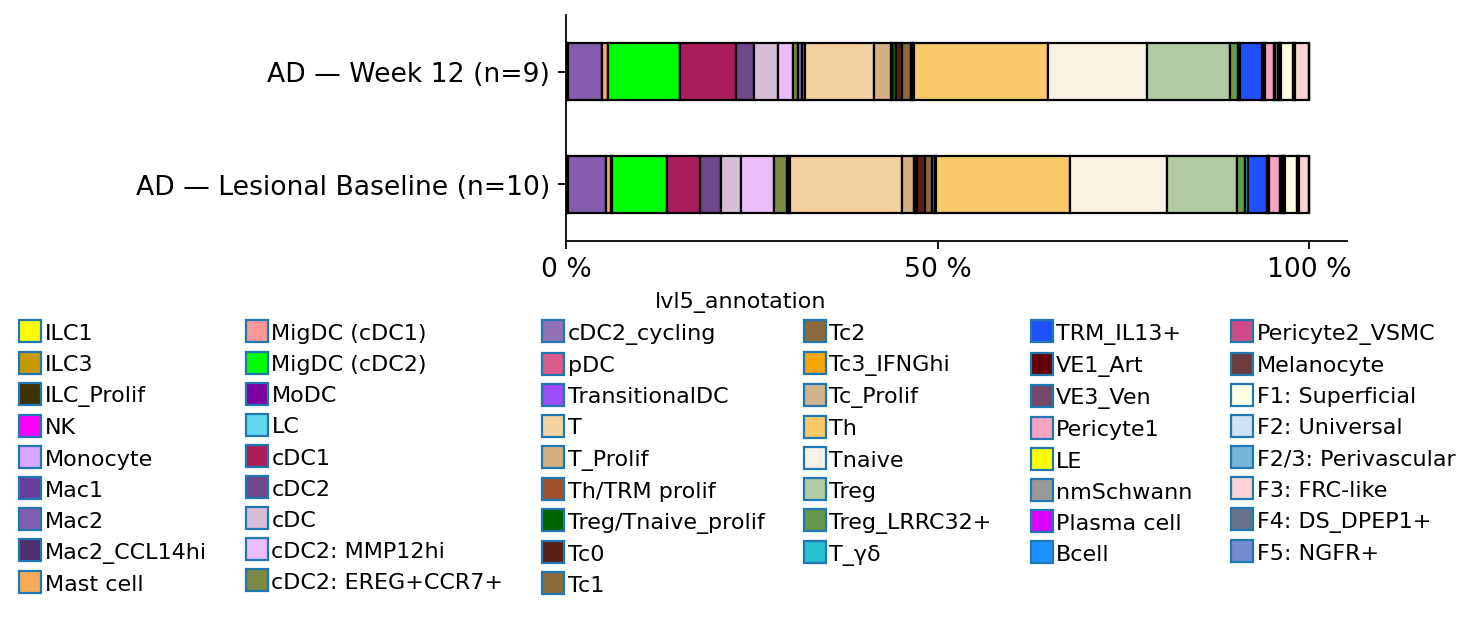

In [24]:
MIN_TEXT_PERCENT     = 2
colors_dict          = colors         

adata_filtered=adata_time[adata_time.obs["disease_overall"]=="AD"]
valid_samples = (adata_filtered.obs["info_id6"]
                    .value_counts()
                    .loc[lambda s: s > 10]
                    .index)
adata_filtered = adata_filtered[adata_filtered.obs["info_id6"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Timepoint"].str.startswith(("Les", "Week 12", "Baseline_r"))
]

adata_filtered = adata_filtered[
    ~adata_filtered.obs[CELL_ANNOTATION].str.startswith(("KC_S", "Sweat", "Nonsp"))
]

df = adata_filtered.obs[[CELL_ANNOTATION, "disease_overall", "Timepoint"]]

count_tbl = (
    df.groupby(["disease_overall", "Timepoint", CELL_ANNOTATION])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index=["disease_overall", "Timepoint"],
                    columns=CELL_ANNOTATION,
                    values="cells")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

multi_index = proportions.index
proportions.index = [f"{d} — {tp}" for d, tp in proportions.index]

pat_counts = (
    adata_filtered.obs
        .groupby(["disease_overall", "Timepoint"])["Sanger patient ID"]
        .nunique()
)

keep_idx = [idx for idx in multi_index if pat_counts.get(idx, 0) > 0]
proportions = proportions.loc[[f"{d} — {tp}" for d, tp in keep_idx]]

label_counts = {
    f"{d} — {tp}": pat_counts[(d, tp)] for d, tp in keep_idx
}
ytick_labels = [
    f"{label} (n={label_counts[label]})" for label in proportions.index
]

plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

ax.set_ylabel("", fontsize=14)
ax.set_xlabel("",          fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)

ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

handles = [plt.Line2D([0], [0], marker='s', lw=0,
           markerfacecolor=colors_dict.get(ct, "grey"),
           markersize=10, label=ct)
           for ct in ordered_celltypes]

fig.legend(
    handles, ordered_celltypes,
    title=CELL_ANNOTATION,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
#fig.savefig("fig4_niches_by_times.pdf", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
stop

NameError: name 'stop' is not defined

In [ ]:

valid_samples = (adata_filtered.obs["sample_id"]
                    .value_counts()
                    .loc[lambda s: s > 10]
                    .index)
adata_filtered = adata_filtered[adata_filtered.obs["sample_id"].isin(valid_samples)]

adata_filtered = adata_filtered[
    adata_filtered.obs["Timepoint"].str.startswith(("Les", "Week 8 (resolved)"))
]

adata_filtered = adata_filtered[
    ~adata_filtered.obs["lvl4_annotation"].str.startswith(("KC_S", "Sweat", "Nonsp"))
]

# ─────────────────────────────────────────────────────────────
# 1 · Cell-count table   (disease × time-point × cell-type)
# ─────────────────────────────────────────────────────────────
df = adata_filtered.obs[["lvl4_annotation", "disease_overall", "Timepoint"]]

count_tbl = (
    df.groupby(["disease_overall", "Timepoint", "lvl4_annotation"])
      .size()
      .reset_index(name="cells")
)

pivot = (
    count_tbl.pivot(index=["disease_overall", "Timepoint"],
                    columns="lvl4_annotation",
                    values="cells")
          .fillna(0)
)

ordered_celltypes = [ct for ct in ordered_celltypes if ct in pivot.columns]
pivot = pivot[ordered_celltypes]

# ─────────────────────────────────────────────────────────────
# 2 · Convert rows → percent
# ─────────────────────────────────────────────────────────────
proportions = pivot.div(pivot.sum(axis=1), axis=0) * 100

# keep a copy of the MultiIndex for patient-count lookup
multi_index = proportions.index

# pretty display index “Disease — Timepoint”
proportions.index = [f"{d} — {tp}" for d, tp in proportions.index]

# ─────────────────────────────────────────────────────────────
# 3 · Compute unique-patient counts per (disease, time-point)
# ─────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────
# 3 · Unique-patient counts  +  drop 0-patient rows
# ─────────────────────────────────────────────────────────────
pat_counts = (
    adata_filtered.obs
        .groupby(["disease_overall", "Timepoint"])["Sanger patient ID"]
        .nunique()
)

# ★ keep only rows with ≥1 patient
keep_idx = [idx for idx in multi_index if pat_counts.get(idx, 0) > 0]
proportions = proportions.loc[[f"{d} — {tp}" for d, tp in keep_idx]]

# recompute label→count dict for the kept rows
label_counts = {
    f"{d} — {tp}": pat_counts[(d, tp)] for d, tp in keep_idx
}
ytick_labels = [
    f"{label} (n={label_counts[label]})" for label in proportions.index
]



# ─────────────────────────────────────────────────────────────
# 4 · Plot
# ─────────────────────────────────────────────────────────────
plot_cols = [colors_dict.get(ct, "grey") for ct in ordered_celltypes]

fig_h = 2 + 0.1 * len(proportions)
fig, ax = plt.subplots(figsize=(8, fig_h))

proportions.plot(
    kind="barh",
    stacked=True,
    color=plot_cols,
    edgecolor="black",
    ax=ax,
    legend=False,
)

# label slices > 2 %
# for r, (_, row) in enumerate(proportions.iterrows()):
#     cum = 0
#     for c, val in enumerate(row):
#         if val > MIN_TEXT_PERCENT:
#             ax.text(
#                 cum + val/2,
#                 r,
#                 ordered_celltypes[c],
#                 ha="center", va="center",
#                 fontsize=9, color="black", clip_on=True,
#             )
#         cum += val

# axes cosmetics
ax.set_ylabel("", fontsize=14)
ax.set_xlabel("",          fontsize=14)
ax.set_title(f"", fontsize=16)

ax.set_yticks(range(len(proportions)))
ax.set_yticklabels(ytick_labels, fontsize=12)

ax.set_xticks([0, 50, 100])
ax.set_xticklabels(["0 %", "50 %", "100 %"], fontsize=12)
ax.invert_yaxis()
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# legend underneath
handles = [plt.Line2D([0], [0], marker='s', lw=0,
           markerfacecolor=colors_dict.get(ct, "grey"),
           markersize=10, label=ct)
           for ct in ordered_celltypes]

fig.legend(
    handles, ordered_celltypes,
    title="lvl5_annotation",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.80),
    ncol=6,
    frameon=False,
    fontsize=10,
    title_fontsize=10,
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
#fig.savefig("fig4_niches_by_times_PSORIASIS.pdf", dpi=300, bbox_inches="tight")

plt.show()



In [ ]:
proportions